<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlibtutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

matplotlib tutorials を利用した matplotlib の学習。 実験学習。 若干かけあしかも。

# 環境 スタイル
matplotlib.style.use で スタイルが選べる。


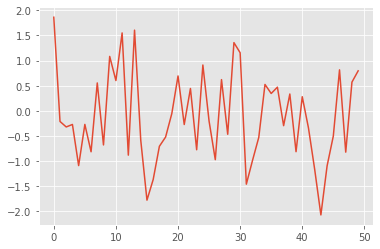

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot') # ここでスタイル名を指定する
data = np.random.randn(50)
plt.plot(data) # x,y形式でなくてもplotできる
plt.show()

In [ ]:
# print(plt.style.available) とすればstyleのリストが得られる

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# styleによってなにをしているかが違うので事前に使ったstyleの影響を受ける。使い物にならないのではないか
# それぞれのstyleの内容を知りたい。まあいいか
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(4,4),facecolor='pink')
plt.style.use('Solarize_Light2')
plt.style.use('classic')
plt.style.use('seaborn')
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

plt.plot の中で 'r-o' とか指定できる。

plt.rcParamsで細かく指定できる。

rcParamsで指定したもののセットが style なのだろう。
&nbsp;  
&nbsp;  
plt.figure(figsize=(4,4),facecolor='pink')

とかで指定すると、rcParamsにかかわらず優先されるので、plt.plotを使う限りではrcParamsをあまり細かく学ぶ必要はないのかもしれない。 古い仕様なのかもしれない。
&nbsp;  
&nbsp;  
sympyのplotを使う場合、rcParamsの環境だけを使うようなので、知っておく必要はある。



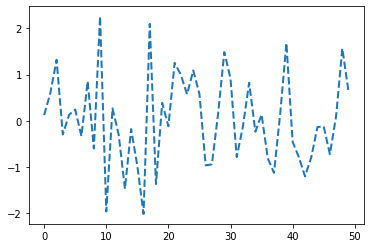

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(50)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'
plt.plot(data)
plt.show()
# from sympy import *
# x =symbols('x')
# plot(x**2,(x,-0.5,0.5))

グラフの色は勝手に選ばれるのを変えるには axes.prop_cycle を変えるとあるが、次のプログラムはエラーになった。
&nbsp;  
&nbsp;  
&nbsp;  
colorについて調べる

cyclerについて調べる



In [ ]:
# import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y']
# plt.plot(data)  # first color is red
# plt.show()

グラフのスタイルを設定するのに `style.use`, `rcParams` 以外に `rc` でキーワード引数をつかってまとめて設定する方法がある。


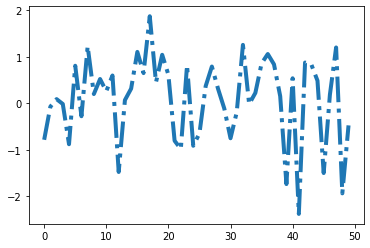

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(50)
# plt.rcParams['lines.linewidth'] = 8
plt.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

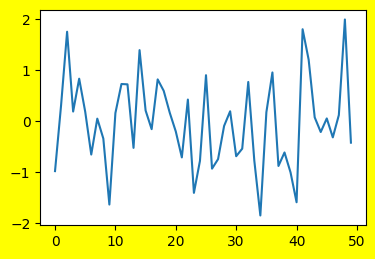

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(50)
plt.rcdefaults() # defaultはcolabのdefaultではない
plt.rcParams['figure.figsize']=[4.2,2.8] # 反映する
# plt.figure(figsize=(4,4),facecolor='pink') # 反映する。優先される
plt.rcParams['figure.facecolor']='yellow' # 反映するが、弱い
plt.rcParams['lines.color']='black' # 反映しない
# plt.plot(data, 'k--') # 反映する
plt.plot(data)
plt.show()

In [ ]:
# rcParamsの内容を知る方法
import matplotlib.pyplot as plt
# print(plt.rcParams) # lines.color:C0 , figure.figsize: [6.4, 4.8], C0 は cycler の 0番目の意味か?

`matplotlib.rcdefaults`  Matplotlib のデフォルトに戻る。

colab のデフォルトはランタイムを中断すればわかる => 違いを比較してみよう。 => 違いはほとんどなかった
&nbsp;  
&nbsp;  

rcParams の設定の validation については `matplotlib.rcsetup` にかかれているとか。 

=> 例 >>> c = cycler(color=['red', 'green', 'blue']) とか。 わからない。

&nbsp;  
&nbsp;  

matplotlibの設定は `matplotlibrc` というファイルにあります、とか。


In [ ]:
import matplotlib.pyplot as plt
# print(plt.rcParams)

# Usage Guide


# いまここ user guide 


matplotlibはfigureというエリアに設定されたaxという座標にデータを描画する。

axを持ったfigureを作る最も簡単な方法は

fig, ax = plt.subplots()

である。


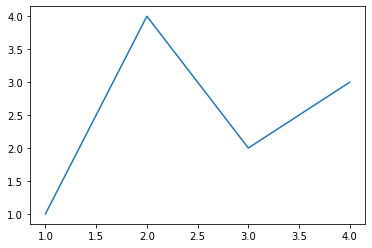

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # 1つの座標axを持つfigureを作る
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # axにplotする

MATLABを含め他のグラフ作成ライブラリーは座標を明示的に作る必要がない。

matplotlibでも、axを作る手間を省いて、次のようにすると現在(current)の座標にグラフを書くことができる。

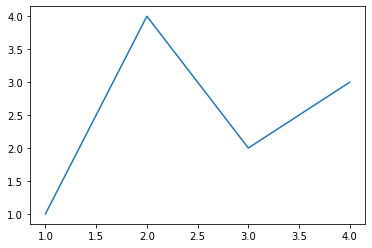

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

In [ ]:
import matplotlib
# help(matplotlib.figure.Figure)
# dir(matplotlib.figure.Figure)
dir(matplotlib.axes.Axes)
# help(matplotlib.axes.Axes)

plotで使うのは `numpy.array` なので、次のように変換する必要があるかもしれない。

pandas.Dataframe の場合:  

    a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))  
    a_asarray = a.values  

numpy.matrix の場合:  

    b = np.matrix([[1, 2], [3, 4]])  
    b_asarray = np.asarray(b)  

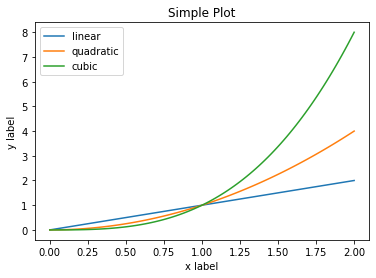

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100) # 0,2の間を100に刻む
fig, ax = plt.subplots()  # figure と ax を作る
ax.plot(x, x, label='linear')  # プロットする
ax.plot(x, x**2, label='quadratic')  # y=x^2のグラフ
ax.plot(x, x**3, label='cubic')  # y=x^3のグラフ
ax.set_xlabel('x label')  # x軸のラベル
ax.set_ylabel('y label')  # y軸のラベル
ax.set_title("Simple Plot")  # グラフにタイトルをつける
ax.legend()  # レジェンドを加える

or (pyplot-style)



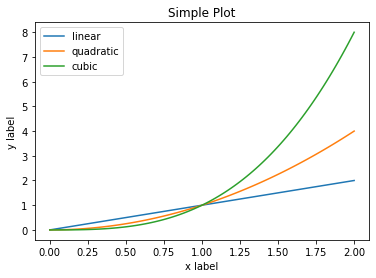

In [3]:
# fgとaxを作らない場合の例
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')  # 明示されていない座標にプロットする
plt.plot(x, x**2, label='quadratic')  
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

fig,axを作ってオブジェクトに関数を使っていくいわゆるOO型のプログラミングのメリットは、違うデータセットで同じグラフを繰り返し書く際に現れる。

そのような場合の関数の書き方の例を次に示す。


In [1]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

この関数は次のように使う


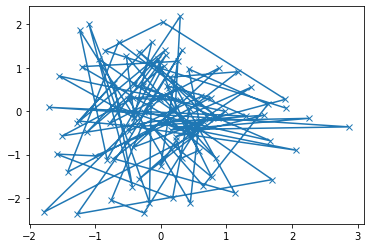

In [4]:
import matplotlib.pyplot as plt
import numpy as np
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

違うデータで同じ関数を使って2枚のグラフを描くことができる。


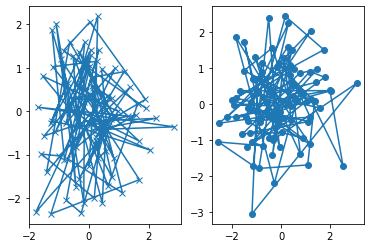

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

# バックエンド backend


バックエンドとはなにか。  

グラフを出力する時、colab (jupyter) のように inline でプロットする場合だけでなく、さまざまな状況で matplotlib は使われる。 そのような様々な出力に対応する部分をバックエンドと呼ぶ。 

例えば、次のようなユースケースがある。  
- Pythonシェルからインタラクティブにmatplotlibを使用し、コマンドを入力するとプロットウィンドウがポップアップする  
- wxpythonやpygtkなどのグラフィカルユーザーインターフェイスに埋め込んで、アプリケーションを構築する
- バッチスクリプトで数値シミュレーションからポストスクリプト画像を生成する
- Webアプリケーションサーバーを実行してグラフを動的に提供する

バックエンドには2つのタイプがある。  
1. pygtk、wxpython、tkinter、qt4、macosx で使用するためのユーザーインターフェイスバックエンド。ユーザーインターフェイスバックエンドはインタラクティブバックエンド、対話型バックエンドとも呼ばれる
2. PNG、SVG、PDF、PS などの画像ファイルを作成するためのハードコピーバックエンド。非対話型バックエンドとも呼ばれる

バックエンドの設定は3通りの方法がある。
1. `matplotlibrc` ファイルで パラメーター `backend` で指定する
2. 環境変数 envvar:`MPLBACKEND` を使う
3. 関数 `matplotlib.use` を使う


# いまここ なう



## What is interactive mode?

Use of an interactive backend (see `what-is-a-backend`)
permits--but does not by itself require or ensure--plotting
to the screen.  Whether and when plotting to the screen occurs,
and whether a script or shell session continues after a plot
is drawn on the screen, depends on the functions and methods
that are called, and on a state variable that determines whether
matplotlib is in "interactive mode".  The default Boolean value is set
by the :file:`matplotlibrc` file, and may be customized like any other
configuration parameter (see :doc:`/tutorials/introductory/customizing`).  

It
may also be set via :func:`matplotlib.interactive`, and its
value may be queried via :func:`matplotlib.is_interactive`.  Turning
interactive mode on and off in the middle of a stream of plotting
commands, whether in a script or in a shell, is rarely needed
and potentially confusing, so in the following we will assume all
plotting is done with interactive mode either on or off.

<div class="alert alert-info"><h4>Note</h4><p>Major changes related to interactivity, and in particular the
   role and behavior of :func:`~matplotlib.pyplot.show`, were made in the
   transition to matplotlib version 1.0, and bugs were fixed in
   1.0.1.  Here we describe the version 1.0.1 behavior for the
   primary interactive backends, with the partial exception of
   *macosx*.</p></div>

Interactive mode may also be turned on via :func:`matplotlib.pyplot.ion`,
and turned off via :func:`matplotlib.pyplot.ioff`.

<div class="alert alert-info"><h4>Note</h4><p>Interactive mode works with suitable backends in ipython and in
   the ordinary python shell, but it does *not* work in the IDLE IDE.
   If the default backend does not support interactivity, an interactive
   backend can be explicitly activated using any of the methods discussed
   in `What is a backend?`_.</p></div>


### Interactive example

From an ordinary python prompt, or after invoking ipython with no options,
try this::

    import matplotlib.pyplot as plt
    plt.ion()
    plt.plot([1.6, 2.7])

This will pop up a plot window. Your terminal prompt will remain active, so
that you can type additional commands such as::

    plt.title("interactive test")
    plt.xlabel("index")

On most interactive backends, the figure window will also be updated if you
change it via the object-oriented interface. E.g. get a reference to the
`~matplotlib.axes.Axes` instance, and call a method of that instance::

    ax = plt.gca()
    ax.plot([3.1, 2.2])

If you are using certain backends (like ``macosx``), or an older version
of matplotlib, you may not see the new line added to the plot immediately.
In this case, you need to explicitly call :func:`~matplotlib.pyplot.draw`
in order to update the plot::

    plt.draw()


### Non-interactive example

Start a fresh session as in the previous example, but now
turn interactive mode off::

    import matplotlib.pyplot as plt
    plt.ioff()
    plt.plot([1.6, 2.7])

Nothing happened--or at least nothing has shown up on the
screen (unless you are using *macosx* backend, which is
anomalous).  To make the plot appear, you need to do this::

    plt.show()

Now you see the plot, but your terminal command line is
unresponsive; `.pyplot.show()` *blocks* the input
of additional commands until you manually kill the plot
window.

What good is this--being forced to use a blocking function?
Suppose you need a script that plots the contents of a file
to the screen.  You want to look at that plot, and then end
the script.  Without some blocking command such as ``show()``, the
script would flash up the plot and then end immediately,
leaving nothing on the screen.

In addition, non-interactive mode delays all drawing until
``show()`` is called; this is more efficient than redrawing
the plot each time a line in the script adds a new feature.

Prior to version 1.0, ``show()`` generally could not be called
more than once in a single script (although sometimes one
could get away with it); for version 1.0.1 and above, this
restriction is lifted, so one can write a script like this::

    import numpy as np
    import matplotlib.pyplot as plt

    plt.ioff()
    for i in range(3):
        plt.plot(np.random.rand(10))
        plt.show()

which makes three plots, one at a time. I.e. the second plot will show up,
once the first plot is closed.

### Summary

In interactive mode, pyplot functions automatically draw
to the screen.

When plotting interactively, if using
object method calls in addition to pyplot functions, then
call :func:`~matplotlib.pyplot.draw` whenever you want to
refresh the plot.

Use non-interactive mode in scripts in which you want to
generate one or more figures and display them before ending
or generating a new set of figures.  In that case, use
:func:`~matplotlib.pyplot.show` to display the figure(s) and
to block execution until you have manually destroyed them.


## Performance

Whether exploring data in interactive mode or programmatically
saving lots of plots, rendering performance can be a painful
bottleneck in your pipeline. Matplotlib provides a couple
ways to greatly reduce rendering time at the cost of a slight
change (to a settable tolerance) in your plot's appearance.
The methods available to reduce rendering time depend on the
type of plot that is being created.

### Line segment simplification

For plots that have line segments (e.g. typical line plots, outlines
of polygons, etc.), rendering performance can be controlled by
:rc:`path.simplify` and :rc:`path.simplify_threshold`, which
can be defined e.g. in the :file:`matplotlibrc` file (see
:doc:`/tutorials/introductory/customizing` for more information about
the :file:`matplotlibrc` file). :rc:`path.simplify` is a boolean
indicating whether or not line segments are simplified at all.
:rc:`path.simplify_threshold` controls how much line segments are simplified;
higher thresholds result in quicker rendering.

The following script will first display the data without any
simplification, and then display the same data with simplification.
Try interacting with both of them::

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib as mpl

  # Setup, and create the data to plot
  y = np.random.rand(100000)
  y[50000:] *= 2
  y[np.geomspace(10, 50000, 400).astype(int)] = -1
  mpl.rcParams['path.simplify'] = True

  mpl.rcParams['path.simplify_threshold'] = 0.0
  plt.plot(y)
  plt.show()

  mpl.rcParams['path.simplify_threshold'] = 1.0
  plt.plot(y)
  plt.show()

Matplotlib currently defaults to a conservative simplification
threshold of ``1/9``. If you want to change your default settings
to use a different value, you can change your :file:`matplotlibrc`
file.  Alternatively, you could create a new style for
interactive plotting (with maximal simplification) and another
style for publication quality plotting (with minimal
simplification) and activate them as necessary. See
:doc:`/tutorials/introductory/customizing` for
instructions on how to perform these actions.

The simplification works by iteratively merging line segments
into a single vector until the next line segment's perpendicular
distance to the vector (measured in display-coordinate space)
is greater than the ``path.simplify_threshold`` parameter.

<div class="alert alert-info"><h4>Note</h4><p>Changes related to how line segments are simplified were made
  in version 2.1. Rendering time will still be improved by these
  parameters prior to 2.1, but rendering time for some kinds of
  data will be vastly improved in versions 2.1 and greater.</p></div>

### Marker simplification

Markers can also be simplified, albeit less robustly than
line segments. Marker simplification is only available
to :class:`~matplotlib.lines.Line2D` objects (through the
``markevery`` property). Wherever
:class:`~matplotlib.lines.Line2D` construction parameters
are passed through, such as
:func:`matplotlib.pyplot.plot` and
:meth:`matplotlib.axes.Axes.plot`, the ``markevery``
parameter can be used::

  plt.plot(x, y, markevery=10)

The markevery argument allows for naive subsampling, or an
attempt at evenly spaced (along the *x* axis) sampling. See the
:doc:`/gallery/lines_bars_and_markers/markevery_demo`
for more information.

### Splitting lines into smaller chunks

If you are using the Agg backend (see `what-is-a-backend`),
then you can make use of :rc:`agg.path.chunksize`
This allows you to specify a chunk size, and any lines with
greater than that many vertices will be split into multiple
lines, each of which has no more than ``agg.path.chunksize``
many vertices. (Unless ``agg.path.chunksize`` is zero, in
which case there is no chunking.) For some kind of data,
chunking the line up into reasonable sizes can greatly
decrease rendering time.

The following script will first display the data without any
chunk size restriction, and then display the same data with
a chunk size of 10,000. The difference can best be seen when
the figures are large, try maximizing the GUI and then
interacting with them::

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib as mpl
  mpl.rcParams['path.simplify_threshold'] = 1.0

  # Setup, and create the data to plot
  y = np.random.rand(100000)
  y[50000:] *= 2
  y[np.geomspace(10, 50000, 400).astype(int)] = -1
  mpl.rcParams['path.simplify'] = True

  mpl.rcParams['agg.path.chunksize'] = 0
  plt.plot(y)
  plt.show()

  mpl.rcParams['agg.path.chunksize'] = 10000
  plt.plot(y)
  plt.show()

### Legends

The default legend behavior for axes attempts to find the location
that covers the fewest data points (``loc='best'``). This can be a
very expensive computation if there are lots of data points. In
this case, you may want to provide a specific location.

### Using the *fast* style

The *fast* style can be used to automatically set
simplification and chunking parameters to reasonable
settings to speed up plotting large amounts of data.
It can be used simply by running::

  import matplotlib.style as mplstyle
  mplstyle.use('fast')

It is very light weight, so it plays nicely with other
styles, just make sure the fast style is applied last
so that other styles do not overwrite the settings::

  mplstyle.use(['dark_background', 'ggplot', 'fast'])

